In [ ]:
from zipfile import ZipFile
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [ ]:
all_state_mobility_zip = ZipFile("/content/drive/MyDrive/mobility_covid/mobility.zip")
mh_mobility_df = pd.read_csv(all_state_mobility_zip.open("content/Maharashtra.csv"))
covid_cases = pd.read_csv("/content/drive/MyDrive/mobility_covid/phased_districts.csv")

In [ ]:
mh_mobility_df.head()

,Unnamed: 0,GEOMETRY,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,geometry,State
0,0,"LINESTRING (80.52978515625 22.101924376207542,...",2020-08-30 16:00,1102461,Paraswada,1102460,Baihar,4.578168,13,IN,LEVEL4,22.0,35.75,-13.75,-37.414966,0.0,-1.201725,22.089361,80.402657,22.002943,80.731063,NaN,Maharashtra
1,1,"LINESTRING (77.98095703125 18.417077395751605,...",2020-08-30 16:00,1104405,Banswada,1104398,Varni,6.555819,13,IN,LEVEL4,NaN,NaN,NaN,400.000000,0.0,4.000000,18.382414,77.919556,18.528101,77.946995,NaN,Maharashtra
2,2,LINESTRING (76.00708741702154 19.4843208207550...,2020-08-30 16:00,1102945,Ghansawangi,1102945,Ghansawangi,0.090504,13,IN,LEVEL4,1499.0,1598.25,-99.25,-6.206034,0.0,-0.432451,19.498021,76.016638,19.498021,76.016638,NaN,Maharashtra
3,3,LINESTRING (78.11104679739239 19.1571242943060...,2020-08-30 16:00,1104359,Kuntala,1104359,Kuntala,0.000000,13,IN,LEVEL4,150.0,163.00,-13.00,-7.926829,0.0,-0.448365,19.175914,78.111535,19.175914,78.111535,NaN,Maharashtra
4,4,LINESTRING (79.0938774822968 16.68886151877614...,2020-08-30 16:00,1104680,Pedda Adiserla Palle,1104680,Pedda Adiserla Palle,0.036466,13,IN,LEVEL4,408.0,382.00,26.00,6.788512,0.0,0.152242,16.682557,79.111187,16.682557,79.111187,NaN,Maharashtra


In [ ]:
covid_cases["Date"] = pd.to_datetime(covid_cases["Date"])
covid_cases.head()

,Unnamed: 0,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Phase
0,0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,NaN,pre_1
1,1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN,pre_1
2,2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN,pre_1
3,3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN,pre_1
4,4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN,pre_1


In [ ]:
covid_working_1 = covid_cases[covid_cases['Date']>="2020-08-13"][covid_cases["State"]=="Maharashtra"].groupby(["Date","Phase"],as_index=False)["Confirmed"].sum()
covid_working_1["Daily"] = covid_working_1[["Date","Confirmed"]].diff()["Confirmed"]
covid_working_1

,Date,Phase,Confirmed,Daily
0,2020-08-13,wave_1,560126,NaN
1,2020-08-14,wave_1,572734,12608.0
2,2020-08-15,wave_1,584754,12020.0
3,2020-08-16,wave_1,595865,11111.0
4,2020-08-17,wave_1,604358,8493.0
...,...,...,...,...
440,2021-10-27,post_2,6606536,1485.0
441,2021-10-28,post_2,6607954,1418.0
442,2021-10-29,post_2,6609292,1338.0
443,2021-10-30,post_2,6609906,614.0


In [ ]:
mh_mobility_df.columns

Index(['Unnamed: 0', 'GEOMETRY', 'date_time', 'start_polygon_id',
       'start_polygon_name', 'end_polygon_id', 'end_polygon_name', 'length_km',
       'tile_size', 'country', 'level', 'n_crisis', 'n_baseline',
       'n_difference', 'percent_change', 'is_statistically_significant',
       'z_score', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'geometry',
       'State'],
      dtype='object')

In [ ]:
mh_mobility_df['is_statistically_significant'].value_counts()

0.0    9464220
Name: is_statistically_significant, dtype: int64

In [ ]:
working_data_1 = mh_mobility_df[["date_time","length_km","n_crisis","n_baseline","n_difference","percent_change","z_score","start_lat","start_lon","end_lat","end_lon"]]

In [ ]:
working_data_1['date'] = pd.to_datetime(working_data_1['date_time']).dt.date
working_data_1['time'] = pd.to_datetime(working_data_1['date_time']).dt.time
working_data_1.head()

,date_time,length_km,n_crisis,n_baseline,n_difference,percent_change,z_score,start_lat,start_lon,end_lat,end_lon,date,time
0,2020-08-30 16:00,4.578168,22.0,35.75,-13.75,-37.414966,-1.201725,22.089361,80.402657,22.002943,80.731063,2020-08-30,16:00:00
1,2020-08-30 16:00,6.555819,NaN,NaN,NaN,400.000000,4.000000,18.382414,77.919556,18.528101,77.946995,2020-08-30,16:00:00
2,2020-08-30 16:00,0.090504,1499.0,1598.25,-99.25,-6.206034,-0.432451,19.498021,76.016638,19.498021,76.016638,2020-08-30,16:00:00
3,2020-08-30 16:00,0.000000,150.0,163.00,-13.00,-7.926829,-0.448365,19.175914,78.111535,19.175914,78.111535,2020-08-30,16:00:00
4,2020-08-30 16:00,0.036466,408.0,382.00,26.00,6.788512,0.152242,16.682557,79.111187,16.682557,79.111187,2020-08-30,16:00:00


In [ ]:
mean_km = working_data_1.groupby("date", as_index=False)['length_km'].mean()
mean_km['date'] = pd.to_datetime(mean_km['date'])
mean_km['7daymean'] = mean_km.rolling(window=7).mean()
mean_km

,date,length_km,7daymean
0,2020-08-13,27.232847,NaN
1,2020-08-14,27.251162,NaN
2,2020-08-15,26.823139,NaN
3,2020-08-16,25.947957,NaN
4,2020-08-17,27.886973,NaN
...,...,...,...
439,2021-10-27,39.884211,41.536060
440,2021-10-28,40.402150,41.345076
441,2021-10-29,39.265684,41.159139
442,2021-10-30,43.206157,41.142963


In [ ]:
print(set(covid_working_1["Date"])-set(mean_km['date']))

{Timestamp('2021-07-03 00:00:00')}


In [ ]:
temp = pd.DataFrame({
    "date":[pd.to_datetime("2021-07-03")],
    "length_km":[np.nan],
    "7daymean":[np.nan]
})
mean_km = mean_km.append(temp).sort_values("date").reset_index()
mean_km["daily_cases"] = covid_working_1["Daily"]
mean_km["phase"] = covid_working_1["Phase"]
mean_km['length_km'] = mean_km['length_km'].astype(float)
mean_km

,index,date,length_km,7daymean,daily_cases,phase
0,0,2020-08-13,27.232847,NaN,NaN,wave_1
1,1,2020-08-14,27.251162,NaN,12608.0,wave_1
2,2,2020-08-15,26.823139,NaN,12020.0,wave_1
3,3,2020-08-16,25.947957,NaN,11111.0,wave_1
4,4,2020-08-17,27.886973,NaN,8493.0,wave_1
...,...,...,...,...,...,...
440,439,2021-10-27,39.884211,41.536060,1485.0,post_2
441,440,2021-10-28,40.402150,41.345076,1418.0,post_2
442,441,2021-10-29,39.265684,41.159139,1338.0,post_2
443,442,2021-10-30,43.206157,41.142963,614.0,post_2


In [ ]:
mean_km

,index,date,length_km,7daymean,daily_cases,phase
0,0,2020-08-13,27.232847,NaN,NaN,wave_1
1,1,2020-08-14,27.251162,NaN,12608.0,wave_1
2,2,2020-08-15,26.823139,NaN,12020.0,wave_1
3,3,2020-08-16,25.947957,NaN,11111.0,wave_1
4,4,2020-08-17,27.886973,NaN,8493.0,wave_1
...,...,...,...,...,...,...
440,439,2021-10-27,39.884211,41.536060,1485.0,post_2
441,440,2021-10-28,40.402150,41.345076,1418.0,post_2
442,441,2021-10-29,39.265684,41.159139,1338.0,post_2
443,442,2021-10-30,43.206157,41.142963,614.0,post_2


In [ ]:
a,b = np.unique(mean_km['phase'],return_inverse="True")
print(a)
b

['post_2' 'transition' 'wave_1' 'wave_2']


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Text(0.5, 1.0, 'Daily Trend of New Cases and Average Movement in Maharashtra')

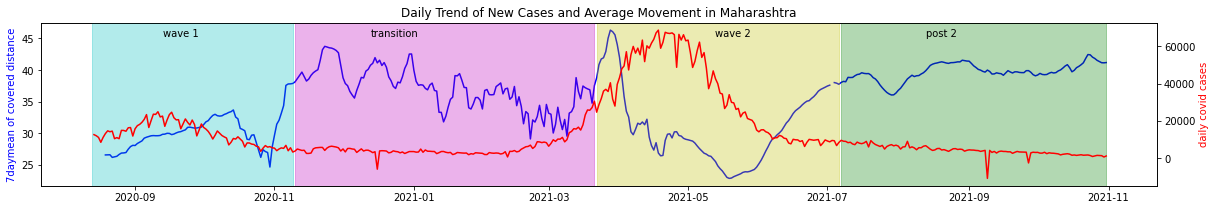

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
ax1 = plt.plot()
plt.plot(mean_km["date"].values,mean_km["7daymean"].values,c='b')
plt.ylabel('7daymean of covered distance',color='b')

ax2 = plt.gca().twinx()
ax2.plot(mean_km["date"].values,mean_km["daily_cases"].values,c='r')
plt.ylabel('daily covid cases',color='r')
plt.axvspan(pd.to_datetime("2020-08-13"),pd.to_datetime("2020-11-09"), alpha=0.3, color='c')
plt.text(pd.to_datetime("2020-09-13"),65000,'wave 1', size=10)
plt.axvspan(pd.to_datetime("2020-11-10"),pd.to_datetime("2021-03-21"), alpha=0.3, color='m')
plt.text(pd.to_datetime("2020-12-13"),65000,'transition', size=10)
plt.axvspan(pd.to_datetime("2021-03-22"),pd.to_datetime("2021-07-06"), alpha=0.3, color='y')
plt.text(pd.to_datetime("2021-05-13"),65000,'wave 2', size=10)
plt.axvspan(pd.to_datetime("2021-07-07"),pd.to_datetime("2021-10-31"), alpha=0.3, color='g')
plt.text(pd.to_datetime("2021-08-13"),65000,'post 2', size=10)
plt.title("Daily Trend of New Cases and Average Movement in Maharashtra")

(0.0, 75000.0)

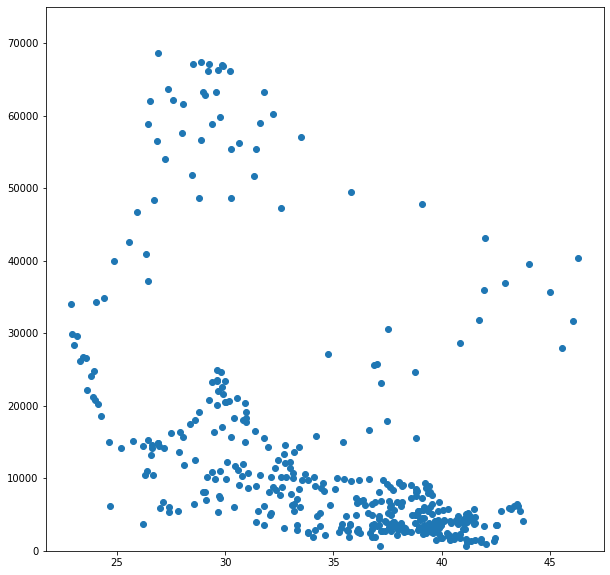

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
ax3 = plt.plot()
plt.scatter(mean_km["7daymean"],mean_km["daily_cases"])
# a,b = np.polyfit(mean_km["7daymean"].values,mean_km["daily_cases"].values,1)
# plt.plot(mean_km["7daymean"], a*mean_km["7daymean"].values + b)
plt.ylim([0,75000])